In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, join
from fitsio import FITS

import matplotlib.pyplot as plt

plt.style.use('MNRAS.mplstyle')

filepath = r"/bsuhome/gladyskamau/BSU-Research/Cardinal/Data/"

# Load the redmapper clusters (HaloRun)

In [2]:
redmapper_cl_path = FITS(filepath+'Halo-Run/Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_redmapper_v0.8.1_runcat_catalog.fit', mode=1)
redmapper_cl = Table(redmapper_cl_path[1].read())
print(len(redmapper_cl))
redmapper_cl[:3]

2813133


halo_id,id,m200,ra,dec,z,refmag,refmag_err,mag,mag_err,mem_match_id,lambda,lambda_e,z_lambda,z_lambda_e,cg_spec_z,z_spec_init,z_init,r_lambda,r_mask,scaleval,maskfrac,zred,zred_e,zred_chisq,chisq,z_lambda_niter,ebv_mean,lnlamlike,lncglike,lnlike,ra_orig,dec_orig,w,dlambda_dz,dlambda_dz2,dlambdavar_dz,dlambdavar_dz2,z_lambda_raw,z_lambda_e_raw,bkg_local,lim_exptime,lim_limmag,lim_limmag_hard,lambda_c,lambda_ce,ncent_good,maskgal_index,pzbins,pz,ra_cent,dec_cent,id_cent,lambda_cent,zlambda_cent,p_cen,q_cen,p_fg,q_miss,p_sat,p_c
int64,int64,float32,float64,float64,float32,float32,float32,float32[4],float32[4],int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32[21],float32[21],float64[5],float64[5],int64[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32,float32[5],float32[5]
5188208,345003398592,202900000000000.0,5.477183688782813,5.2745523244758346,0.95877266,21.323492,0.053162392,24.696373 .. 21.323492,0.2632105 .. 0.053162392,9147,-1.0,-1.0,-1.0,-1.0,0.95877266,0.0,0.0,0.53082454,0.0,-1.0,0.00038587692,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24922661,22.349958,23.33665,0.0,0.0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
20195546,345006183780,143700000000000.0,5.842129454179593,5.108307905445727,0.9119603,20.182123,0.02753646,23.537748 .. 20.182123,0.104840256 .. 0.02753646,21561,13.169256,4.272455,0.92106897,0.029617386,0.9119603,0.0,0.0,0.66667205,1.0000081,1.8922567,0.13813664,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3632296,1558.2155,27.829103,36842.31,0.0,0.0,0.0,0.2357841,22.288511,23.33665,0.0,0.0,0,42,0.7258708 .. 1.1162672,9.82986e-10 .. 0.0018386014,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
18656160,345002374812,136400000000000.0,5.909583020496262,5.025967810075727,0.6413278,19.925241,0.02466881,23.15508 .. 19.925241,0.088762514 .. 0.02466881,24346,10.438616,2.1634963,0.64084387,0.02385007,0.6413278,0.0,0.0,0.63639766,0.9545965,1.0006108,0.002871313,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-469.0137,3.2757404,-3025.5464,0.0,0.0,0.0,0.22397412,22.231564,23.33665,0.0,0.0,0,95,0.50211483 .. 0.7795729,1.7754732e-14 .. 2.0214354e-06,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0 .. 0.0,0.0 .. 0.0


In [3]:
print('{:e}'.format(redmapper_cl['m200'].min()), '{:e}'.format(redmapper_cl['m200'].max()))
print('{:e}'.format(redmapper_cl['lambda'].min()), '{:e}'.format(redmapper_cl['lambda'].max()))
print(sum(redmapper_cl['lambda']<=0))

6.010000e+12 1.753000e+15
-1.000000e+00 4.326658e+02
1731142


In [4]:
redmapper_cl2 = redmapper_cl[redmapper_cl['lambda']>0]
print(len(redmapper_cl2))
print('{:e}'.format(redmapper_cl2['m200'].min()), '{:e}'.format(redmapper_cl2['m200'].max()))
print('{:e}'.format(redmapper_cl2['lambda'].min()), '{:e}'.format(redmapper_cl2['lambda'].max()))

1081991
6.010000e+12 1.753000e+15
3.009443e+00 4.326658e+02


In [5]:
redmapper_cl3 = redmapper_cl[redmapper_cl['lambda']>=20]
print(len(redmapper_cl3))
print('{:e}'.format(redmapper_cl3['m200'].min()), '{:e}'.format(redmapper_cl3['m200'].max()))
print('{:e}'.format(redmapper_cl3['lambda'].min()), '{:e}'.format(redmapper_cl3['lambda'].max()))

20110
6.010000e+12 1.753000e+15
2.000348e+01 4.326658e+02


# Load the redmapper members (HaloRun)

In [9]:
redmapper_me_path = FITS(filepath+'Halo-Run/Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_redmapper_v0.8.1_runcat_catalog_members.fit', mode=1)
redmapper_me = Table(redmapper_me_path[1].read())
print(len(redmapper_me))
redmapper_me[:2]

23682296


mem_match_id,id,z,ra,dec,r,p,pfree,pcol,theta_i,theta_r,refmag,refmag_err,zred,zred_e,zred_chisq,chisq,ebv,zspec,mag,mag_err
int32,int64,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[4],float32[4]
21561,345006183780,0.9119603,5.842129454179593,5.108307905445727,1e-06,0.99080515,1.0,0.9999998,1.0,1.0,20.182123,0.02753646,0.0,0.0,0.0,1.5752558,0.0,0.9119603,23.537748 .. 20.182123,0.104840256 .. 0.02753646
21561,345006238652,0.9119603,5.847097487842974,5.107176671588263,0.100032546,0.82133514,1.0,0.6758122,1.0,1.0,22.23221,0.10399042,0.0,0.0,0.0,0.50198656,0.0,0.9079645,25.104626 .. 22.23221,0.37071404 .. 0.10399042
21561,345002915221,0.9119603,5.845382589448798,5.112647925803074,0.10673663,0.05297605,1.0,0.024812976,1.0,1.0,22.129301,0.09666167,0.0,0.0,0.0,14.260197,0.0,0.8270403,25.311272 .. 22.129301,0.45424423 .. 0.09666167


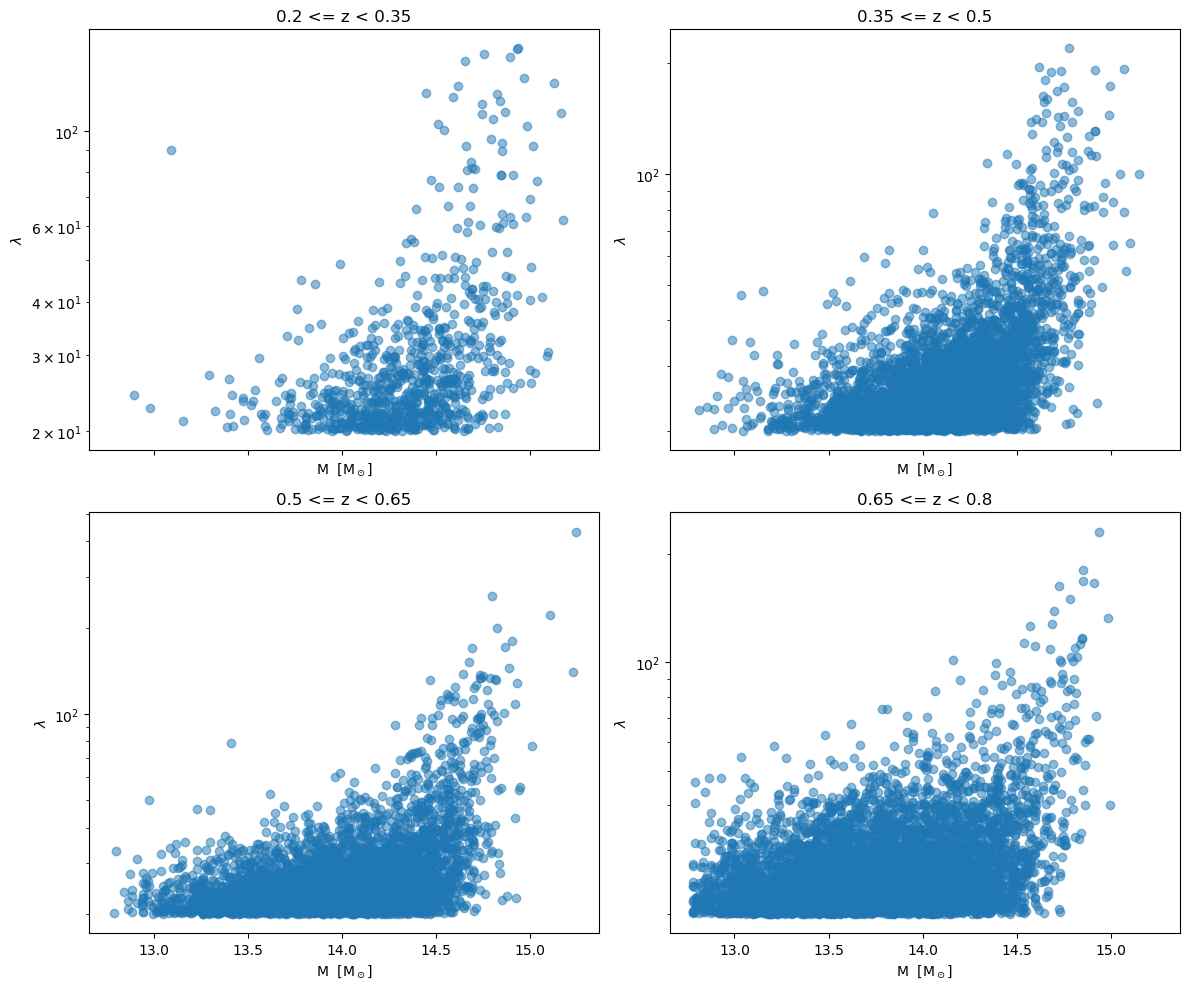

In [33]:
h_cl_02_035 = redmapper_cl3[(redmapper_cl3['z']>=0.2) & (redmapper_cl3['z']<0.35)]
h_cl_035_05 = redmapper_cl3[(redmapper_cl3['z']>=0.35) & (redmapper_cl3['z']<0.5)]
h_cl_05_065 = redmapper_cl3[(redmapper_cl3['z']>=0.5) & (redmapper_cl3['z']<0.65)]
h_cl_065_08 = redmapper_cl3[(redmapper_cl3['z']>=0.65) & (redmapper_cl3['z']<0.8)]

subsets = [h_cl_02_035,h_cl_035_05, h_cl_05_065, h_cl_065_08]
titles = ['0.2 <= z < 0.35','0.35 <= z < 0.5', '0.5 <= z < 0.65', '0.65 <= z < 0.8']

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12, 10))
for i, subset_df in enumerate(subsets):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(np.log10(subset_df['m200']), subset_df['lambda'], alpha=0.5, marker='o')
    ax[row, col].set_title(titles[i])
    ax[row, col].set_xlabel(r'M  [$\rm M_\odot$]')
    ax[row, col].set_ylabel(r'$\lambda$')
    ax[row, col].set_yscale('log')


plt.tight_layout()
plt.show()

In [8]:
# np.save(filepath+'HaloRun_Halo_Clusters_Lamgt20-20110.npy',redmapper_cl3)  # lambda>=20
# np.save(filepath+'HaloRun_Halo_Clusters-_Lamgt0-1081991.npy',redmapper_cl2)  # lambda>0

# Computing the error bars by diving the sky into patches

In [6]:
### Load the halos with the DS and Sigma profiles
h = 0.70
sigma_ds_profile =  Table(np.load(filepath+"correctfilev2.npy"))
print(len(sigma_ds_profile))
print(sum(np.all(sigma_ds_profile['Sigma'] == 0, axis=1)))
sigma_ds_profile = sigma_ds_profile[(np.all(sigma_ds_profile['Sigma'] != 0, axis=1)) & (sigma_ds_profile['pid']==-1)]
sigma_ds_profile['Sigma'] = sigma_ds_profile['Sigma']*1e12*h
sigma_ds_profile['DeltaSigma'] = sigma_ds_profile['DeltaSigma']*1e12*h
print(len(sigma_ds_profile))
sigma_ds_profile[:2]

1454571
167514
1208773


haloid,Mvir,RA,DEC,Redshift,Rvir,cosi,pid,rs,M200m,R200m,rho,DeltaSigma,Sigma,gtall,weightall,ratio,delta
int32,float32,float64,float64,float64,float64,float64,int32,float64,float32,float64,float64[10],float64[15],float64[15],float64[15],float64[15],float64[100],float64[100]
12905996,1104000000000000.0,116.599,18.9969,0.62517,2.1563340659340655,0.464765,-1,0.377642,1129788000000000.0,2.57077,3232607803046852.0 .. 4951584885294.114,225027994363744.4 .. 4491195973346.023,1761882359377507.5 .. 21862032810104.79,-2.0638824814096005e-05 .. 0.6538981002611183,2.6673175421036414e-07 .. 0.0691232562888688,8.064741778139222 .. 1.0457879038100961,287.8731346185066 .. 5.31543402099229
35142654,963800000000000.0,12.3843,15.0544,0.62133,2.0602021978021976,0.673965,-1,0.409137,991244500000000.0,2.46113,1.1785172540359254e+16 .. 8011401459616.633,228034835634536.3 .. 3157197076052.113,2073043573443353.5 .. 21317607969554.035,0.0 .. 0.1991121235725387,0.0 .. 0.06996756822056328,8.109481193785157 .. 1.0461027816248183,287.34227585727774 .. 5.351987610686462


In [7]:
cluster_halos_red = Table(np.load(filepath + "HaloRun_Halo_Clusters_Lamgt0-1081991.npy"))
cluster_halos_red = Table(join(sigma_ds_profile,cluster_halos_red, keys_right=['halo_id','m200'],keys_left=['haloid','Mvir']))
print(len(cluster_halos_red))
cluster_halos_red[:2]

303308


haloid,Mvir,RA,DEC,Redshift,Rvir,cosi,pid,rs,M200m,R200m,rho,DeltaSigma,Sigma,gtall,weightall,ratio,delta,halo_id,id,m200,ra,dec,z,refmag,refmag_err,mag,mag_err,mem_match_id,lambda,lambda_e,z_lambda,z_lambda_e,cg_spec_z,z_spec_init,z_init,r_lambda,r_mask,scaleval,maskfrac,zred,zred_e,zred_chisq,chisq,z_lambda_niter,ebv_mean,lnlamlike,lncglike,lnlike,ra_orig,dec_orig,w,dlambda_dz,dlambda_dz2,dlambdavar_dz,dlambdavar_dz2,z_lambda_raw,z_lambda_e_raw,bkg_local,lim_exptime,lim_limmag,lim_limmag_hard,lambda_c,lambda_ce,ncent_good,maskgal_index,pzbins,pz,ra_cent,dec_cent,id_cent,lambda_cent,zlambda_cent,p_cen,q_cen,p_fg,q_miss,p_sat,p_c
int32,float32,float64,float64,float64,float64,float64,int32,float64,float32,float64,float64[10],float64[15],float64[15],float64[15],float64[15],float64[100],float64[100],int64,int64,float32,float64,float64,float32,float32,float32,float32[4],float32[4],int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32[21],float32[21],float64[5],float64[5],int64[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32,float32[5],float32[5]
2545389,68890000000000.0,167.824,43.7684,0.270594,1.028330532212885,0.37468,-1,0.223423,91154710000000.0,1.11086,2219173286702298.8 .. 1519260804499.2036,67069692666626.26 .. 1352207302427.8604,270762515256387.66 .. 8820674051055.863,-1.6947071735657594e-05 .. -0.15449516342864847,8.507543100463374e-07 .. 0.1256837318098965,12.986549220237457 .. 1.0,92.49977613836931 .. 0.0,2545389,86000938027,68890000000000.0,307.1507302767623,-42.05177541056989,0.27058098,15.416311,0.002200609,17.411655 .. 15.416311,0.0029163673 .. 0.002200609,105524,3.787447,0.92245346,0.2662344,0.011193498,0.27058098,0.0,0.0,0.5196002,0.7794003,1.0219845,0.02279544,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.660377,-3785.54,22.937292,-6145.25,0.0,0.0,0.0,0.35359406,22.737604,23.33665,0.0,0.0,0,54,0.19521515 .. 0.33725366,1.2012419e-12 .. 4.087324e-06,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
2545753,76890000000000.0,166.095,41.6809,0.264409,1.073595708639187,0.125772,-1,0.162836,81108270000000.0,1.06845,2128660225006729.0 .. 356406746880.90045,42765269898771.836 .. 534962221568.1381,310793085470869.4 .. 9475870134850.346,2.4599455803860176e-06 .. 1.3904525821164284,9.836050911240593e-07 .. 0.2052234629155439,13.44301593570594 .. 1.0,91.59406646944285 .. 0.0,2545753,86000938014,76890000000000.0,308.46566717988225,-39.82394747353891,0.26368302,17.42096,0.007450866,19.700352 .. 17.42096,0.012647239 .. 0.007450866,84709,14.603224,7.2508507,0.26972923,0.010604709,0.26368302,0.0,0.0,0.68059653,1.0208949,2.036608,0.50947577,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1500123,1608.6321,291.7176,117789.625,0.0,0.0,0.0,0.20415266,22.128872,23.33665,0.0,0.0,0,88,0.20486188 .. 0.33459654,1.1097649e-10 .. 5.1683737e-06,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0 .. 0.0,0.0 .. 0.0


In [8]:
import matplotlib.cm as cm
npatch = 100
colors = cm.rainbow(np.linspace(0, 1, npatch))
np.random.shuffle(colors)

In [9]:
from astropy.coordinates import SkyCoord
cluster_halos_red['ra'] = cluster_halos_red['ra'] - 360 * (cluster_halos_red['ra'] > 180) 
ra_rad = cluster_halos_red['ra'] * (np.pi / 180.0 )  # Convert to radians
dec_rad = cluster_halos_red['dec'] * (np.pi / 180.0 )
# Most codes don't know anything about Ra, Dec, so convert to x,y,z on unit sphere.
sky_coord = SkyCoord(ra=ra_rad, dec=dec_rad, unit='radian')

# Extract x, y, z coordinates from the SkyCoord object
x = sky_coord.cartesian.x.value
y = sky_coord.cartesian.y.value
z = sky_coord.cartesian.z.value
xyz = np.array([x, y, z]).T

In [10]:
# Used scipy version 1.2.1
import scipy
import time
from scipy.cluster.vq import kmeans, vq
t0 = time.time()
xyz = np.array([x, y, z]).T
cen, distortion = kmeans(xyz, npatch)
scipy_labels = vq(xyz, cen)[0]
t1 = time.time()
scipy_time = t1-t0
print('Time = ',t1-t0)

Time =  72.79592108726501


In [11]:
cluster_halos_red['patch_label'] = scipy_labels

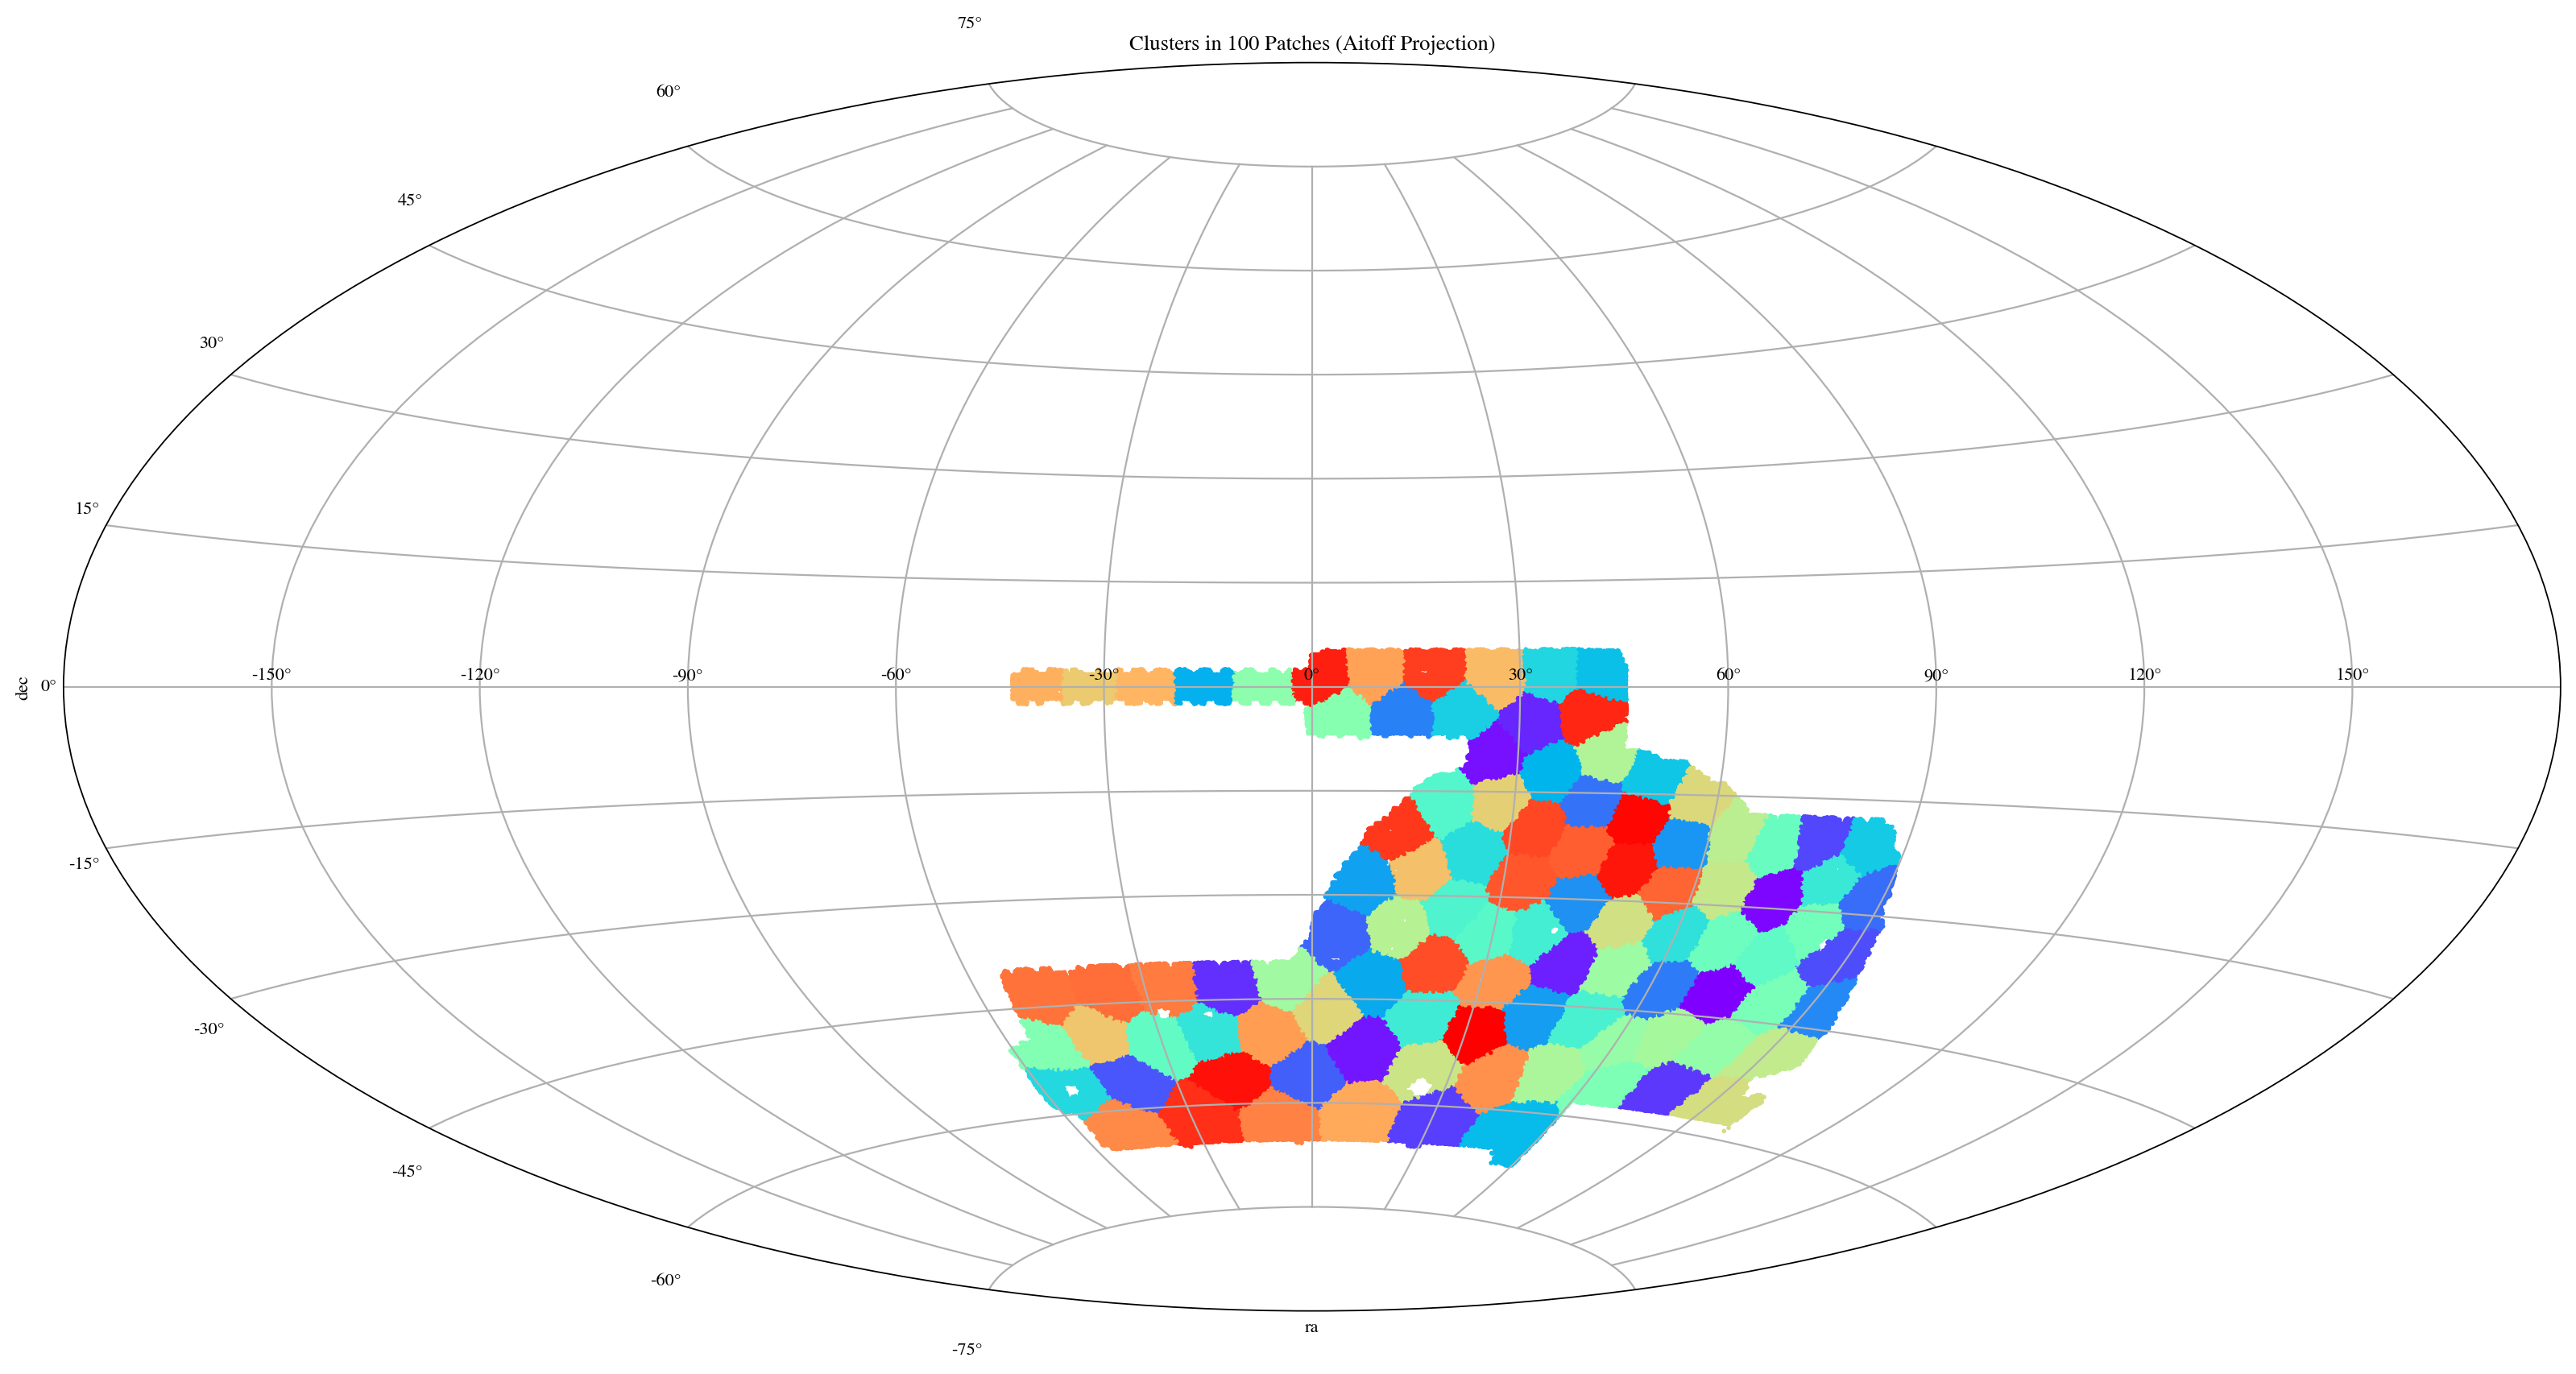

In [12]:
### ra and dec as the coordinate field names
plt.figure(figsize=(20, 15))
plt.subplot(projection="aitoff")
plt.scatter(ra_rad, dec_rad, color=colors[scipy_labels],s=1)

plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Clusters in 100 Patches (Aitoff Projection)')
plt.grid(True)
plt.show()

In [49]:
cluster_halos_red = cluster_halos_red[(cluster_halos_red['Redshift']>=0.2) & (cluster_halos_red['Redshift']<=0.65) & (cluster_halos_red['lambda']>=20)]

# Assuming cluster_halos_red is an Astropy Table and 'lambda' is a column in it
cluster_halos_red['lambda_range'] = pd.cut(cluster_halos_red['lambda'], bins=[20, 30, 45, 60, 500], labels=['(20,30]', '(30,45]', '(45,60]', '(60,500]'])
cluster_halos_red['z_range'] = pd.cut(cluster_halos_red['Redshift'], bins=[0.2, 0.35, 0.5, 0.65], labels=['(0.2,0.35]', '(0.35,0.5]', '(0.5,0.65]'])
# Convert the columns to strings before grouping

grouped_cl_halos_red = cluster_halos_red.group_by([ 'z_range', 'lambda_range'])

In [50]:
Rmin = 0.1
Rmax = 50
pimax = 100
n_decade = (np.log10(Rmax)-np.log10(Rmin))
nrp_per_decade = 10
n_rp = int(nrp_per_decade*n_decade + 1 + 0.001) ## adding the inner most bin
lnrp = np.linspace(np.log(Rmin), np.log(Rmax), 15) # n_rp
bins = np.exp(lnrp)  #*0.70

In [16]:
## Computing Standard Deviation
from astropy.table import QTable

# Astropy QTable to store error bar results
error_table = QTable(names=[ 'z_range', 'lambda_range','mean', 'std'],
                     dtype=['S10', 'S10', 'f8', 'f8'])


mean_deltasigma_values = []
std_deltasigma_values = []

# Iterate over each group in reversed order
for lambda_group in grouped_cl_halos_red.groups:
    jackknife_stds = []
    jackknife_means = []
    # Perform jackknife leave-out approach
    for cluster_label in np.unique(scipy_labels): 
        # Leave out data points belonging to the current cluster label
        jackknife_sample = lambda_group[lambda_group['patch_label'] != cluster_label]['Sigma']
        jackknife_stds.append(np.std(jackknife_sample, axis=0))
        jackknife_means.append(np.mean(jackknife_sample, axis=0))
    
    mean_deltasigma_values.append(np.mean(jackknife_means, axis=0))
    std_deltasigma_values.append(np.mean(jackknife_stds, axis=0))
    
    # Append results to the error table
    error_table.add_row({'z_range': lambda_group['z_range'][0],
                         'lambda_range': lambda_group['lambda_range'][0]})

# Set the values for 'mean_deltasigma' and 'std_deltasigma' columns
error_table['mean'] = np.array(mean_deltasigma_values)
error_table['std'] = np.array(std_deltasigma_values)
# Display the error table
error_table

# np.save(filepath+'Sigma-Errorbars.npy', error_table)

z_range,lambda_range,mean,std
bytes10,bytes10,float64[15],float64[15]
"(0.2,0.35]","(20,30]",588678221295588.0 .. 9890037042635.127,253069673607431.62 .. 2779614275717.033
"(0.2,0.35]","(30,45]",792238247852328.1 .. 10379468010583.676,292184381291516.44 .. 2706922825223.3286
"(0.2,0.35]","(45,60]",835764669687917.8 .. 9888611720996.693,331997222192612.8 .. 3472019416840.9277
"(0.2,0.35]","(60,500]",1102799676883344.1 .. 10524497766249.39,378859248100027.75 .. 2615963613525.629
"(0.35,0.5]","(20,30]",382352373724131.44 .. 12763996183873.186,199540195293934.28 .. 3450326960623.506
"(0.35,0.5]","(30,45]",510675010527626.3 .. 13094575610043.016,246450781027879.6 .. 3512690436963.8486
"(0.35,0.5]","(45,60]",625508649651704.8 .. 13157047065424.27,291129618934672.2 .. 3442505363367.2524
"(0.35,0.5]","(60,500]",900152954931181.9 .. 12903236865747.24,343702292104237.44 .. 3192498484049.634
"(0.5,0.65]","(20,30]",396878243320430.6 .. 15555667742011.562,225975637773997.9 .. 4108941774205.7173


In [60]:
## Computing Standard Error: Variability is samples of the population (i.e. the mean)
from scipy.stats import sem

error_table_sem = QTable(names=[ 'z_range', 'lambda_range','mean', 'sem'],
                     dtype=['S10', 'S10', 'f8', 'f8'])

mean_values = []
sem_values = []

# Iterate over each group in reversed order
for lambda_group in grouped_cl_halos_red.groups:
    jackknife_sem = []
    jackknife_means = []
    # Perform jackknife leave-out approach
    for cluster_label in np.unique(scipy_labels):
        jackknife_sample = lambda_group[lambda_group['patch_label'] != cluster_label]['Sigma']
        jackknife_sem.append(sem(jackknife_sample, axis=0))
        jackknife_means.append(np.mean(jackknife_sample, axis=0))
        
    mean_values.append(np.mean(jackknife_means, axis=0))
    sem_values.append(np.mean(jackknife_sem, axis=0))
    
    # Append results to the error table
    error_table_sem.add_row({'z_range': lambda_group['z_range'][0],
                         'lambda_range': lambda_group['lambda_range'][0]})

error_table_sem['mean'] = np.array(mean_values)
error_table_sem['sem'] = np.array(sem_values)
error_table_sem

# np.save(filepath+'DS-Errorbars_SEM.npy', error_table_sem)

z_range,lambda_range,mean,sem
bytes10,bytes10,float64[15],float64[15]
"(0.2,0.35]","(20,30]",588678221295588.0 .. 9890037042635.127,14331240772573.498 .. 157407939883.33237
"(0.2,0.35]","(30,45]",792238247852328.1 .. 10379468010583.676,33688946586700.555 .. 312109574876.7687
"(0.2,0.35]","(45,60]",835764669687917.8 .. 9888611720996.693,78688325586831.19 .. 822882684814.4396
"(0.2,0.35]","(60,500]",1102799676883344.1 .. 10524497766249.39,66299594956174.03 .. 457787860723.8318
"(0.35,0.5]","(20,30]",382352373724131.44 .. 12763996183873.186,4224141461759.1074 .. 73041174215.7101
"(0.35,0.5]","(30,45]",510675010527626.3 .. 13094575610043.016,9519773809781.545 .. 135685963324.00488
"(0.35,0.5]","(45,60]",625508649651704.8 .. 13157047065424.27,23205748244182.78 .. 274400512989.46884
"(0.35,0.5]","(60,500]",900152954931181.9 .. 12903236865747.24,28990177492867.47 .. 269276571966.74326
"(0.5,0.65]","(20,30]",396878243320430.6 .. 15555667742011.562,4260990685833.183 .. 77478001809.3474


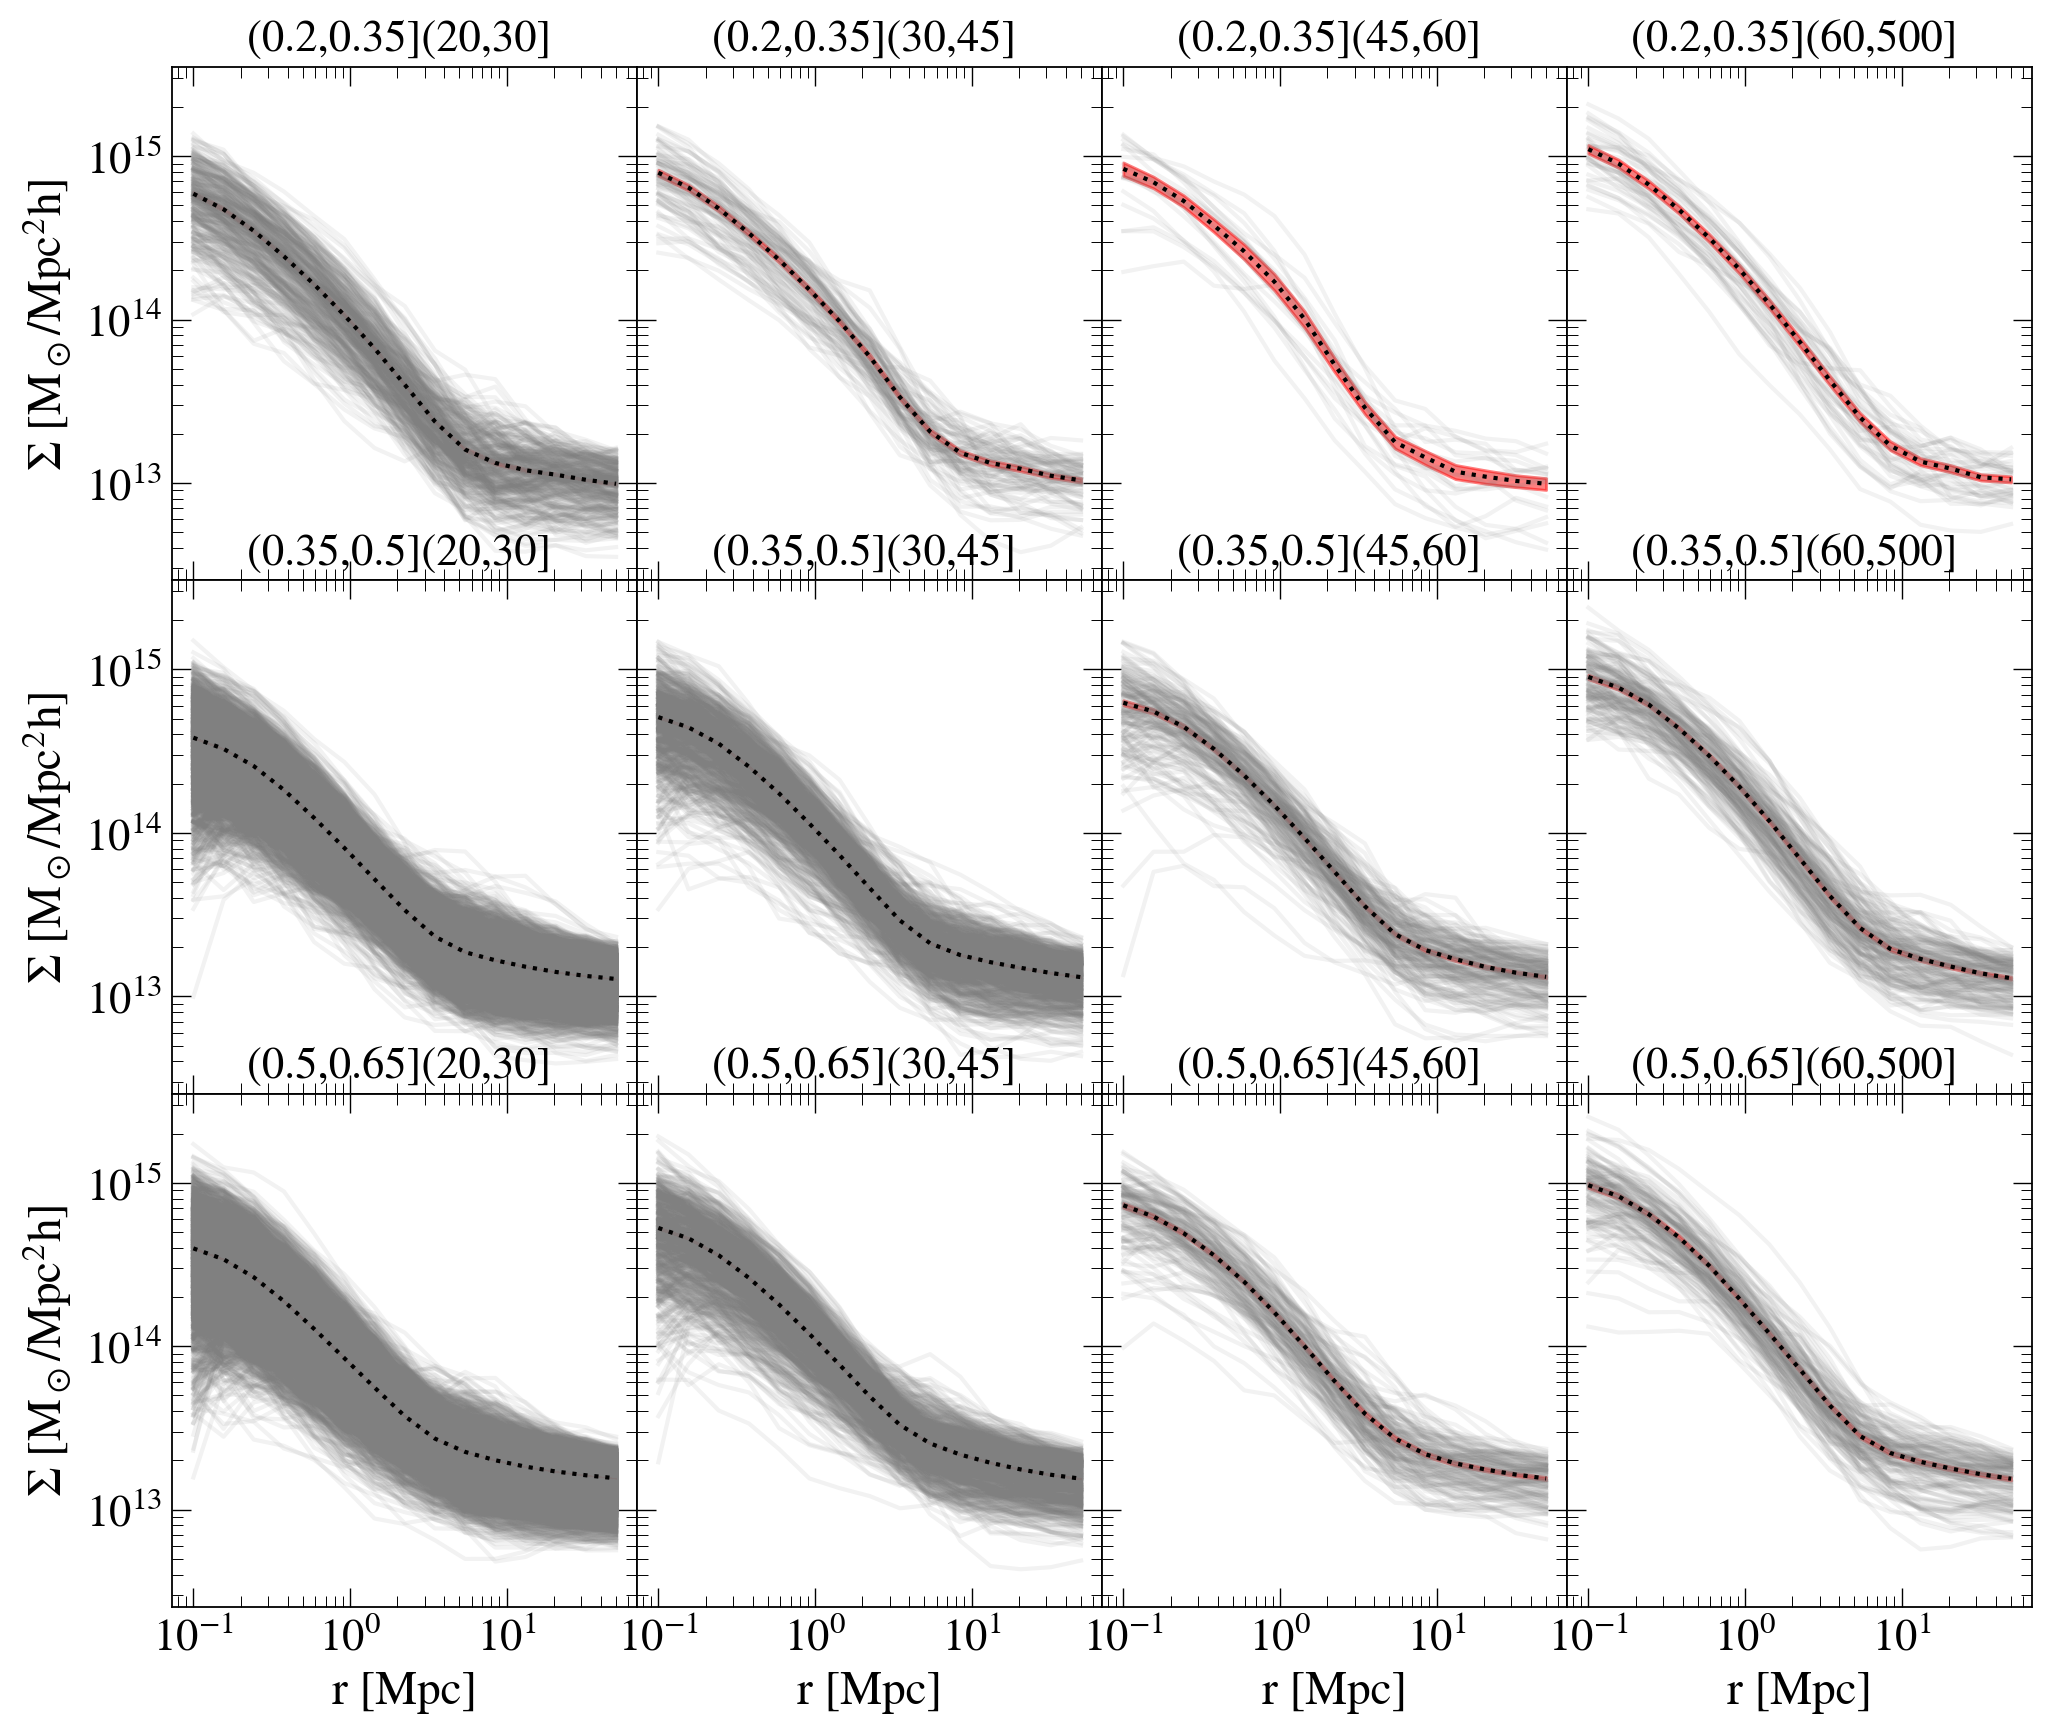

In [62]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 10), sharex=True, sharey=True)

# Flatten the subplot axes for easier iteration
axs = axs.flatten()

for ax in axs:   
    ax.tick_params(axis='both', which='major', labelsize=16)

for i in range(len(error_table)):   
    lambda_range = error_table['lambda_range'][i]
    z_range = error_table['z_range'][i]
    
    clusters = cluster_halos_red[(cluster_halos_red['lambda_range']==lambda_range) & (cluster_halos_red['z_range']==z_range)]
    # Plotting error bars on the current subplot
    for cl in range(len(clusters)):
        axs[i].plot(bins, clusters['Sigma'][cl], alpha=0.1, color='gray')
    
    axs[i].plot(bins, error_table_sem['mean'][i], color='k', linestyle=':')
    axs[i].fill_between(bins, error_table_sem['mean'][i]-error_table_sem['sem'][i], error_table_sem['mean'][i]+error_table_sem['sem'][i], alpha=0.5,color='red')
    axs[i].set_title(f'{z_range}{lambda_range} ', fontsize=16)
    axs[i].set_xlabel('r [Mpc]', fontsize=17)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].grid(False)

       # Show y-label only on the leftmost subplots
    if i % 4 == 0:
        axs[i].set_ylabel('$\Sigma ~[\mathrm{M}_\odot/\mathrm{Mpc}^2 \mathrm{h}]$', fontsize=17)
#         axs[i].yaxis.set_label_coords(-0.15, -0.5)  # Adjust label position

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0, wspace=0)

plt.show()